In [1]:
import os
import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, recall_score, precision_score
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
def getListOfFiles(dirName, data, key):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            data[entry]=[]
            data = getListOfFiles(fullPath,data, entry)
        else:
            data[key].append(fullPath)
                
    return data

def getDataAndTargets(files):
    data = list()
    targets = list()
    for key in files.keys():
        for file in files[key]:
            targets.append(int(key))
            img = plt.imread(file)
            img = resize(img, (16,16),anti_aliasing=True)
            data.append(rgb2gray(img).reshape(1,-1)[0])
    return data, targets

def zip_sort(s, p):
    ordered_s, ordered_p = zip(*sorted(list(zip(s, p)),key = lambda x: x[1]))
    return ordered_s, ordered_p

In [3]:
testFiles = getListOfFiles("./dataset/TEST", {}, '')

In [4]:
trainFiles = getListOfFiles("./dataset/TRAIN", {}, '')

In [5]:
testData, testTargets = getDataAndTargets(testFiles)
testData, testTargets = zip_sort(testData, testTargets)


In [6]:
trainData, trainTargets = getDataAndTargets(trainFiles)
trainData, trainTargets = zip_sort(trainData, trainTargets)

In [7]:
clfMlp = MLPClassifier(activation="relu", solver='adam', learning_rate="adaptive", alpha=0.2, hidden_layer_sizes=(20), max_iter=3000)

clfMlp.fit(trainData, trainTargets)
predicted=clfMlp.predict(testData)
print("Exactitud MLP: ", accuracy_score(testTargets, predicted))
print("Precision MLP: ", precision_score(testTargets, predicted, average='macro'))
print("Recuperacion MLP: ", recall_score(testTargets, predicted, average='macro'))

Exactitud MLP:  0.609347442680776
Precision MLP:  0.5983729562772718
Recuperacion MLP:  0.5956861515524052


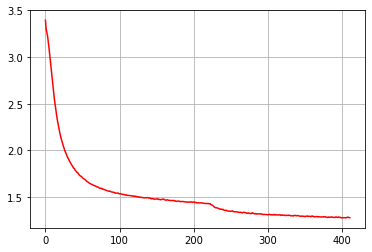

In [8]:
plt.plot(clfMlp.loss_curve_, "r")
plt.grid(True)

Text(0, 0.5, 'True label')

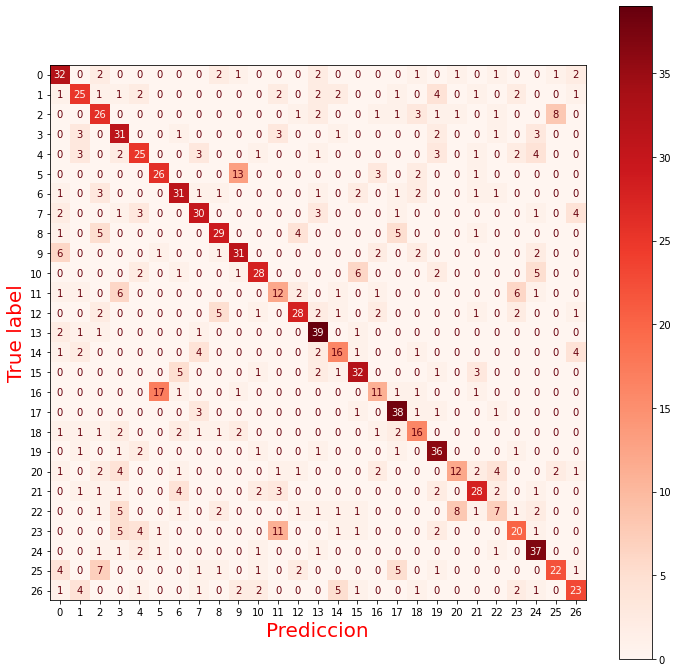

In [9]:
ConfusionMatrixDisplay.from_predictions(testTargets, predicted, cmap="Reds")
plt.gcf().set_size_inches(12,12)
plt.xlabel("Prediccion", color="red", fontsize=20)
plt.ylabel("True label", color="red", fontsize=20)

In [10]:
clfMlp2 = MLPClassifier(solver='adam', alpha=0.2, hidden_layer_sizes=(500,250), max_iter=3000)
clfMlp2.fit(trainData, trainTargets)
predicted2=clfMlp2.predict(testData)
print("Exactitud MLP-2: ", accuracy_score(testTargets, predicted2))
print("Precision MLP-2: ", precision_score(testTargets, predicted2, average='macro'))
print("Recuperacion MLP-2: ", recall_score(testTargets, predicted2, average='macro'))

Exactitud MLP-2:  0.7213403880070547
Precision MLP-2:  0.7267390758280805
Recuperacion MLP-2:  0.7082377492917856


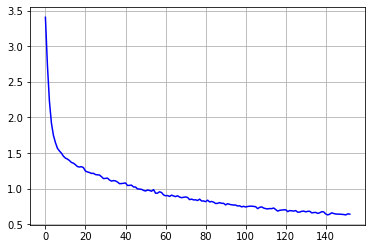

In [11]:
plt.plot(clfMlp2.loss_curve_,"b")
plt.grid(True)

Text(0, 0.5, 'True label')

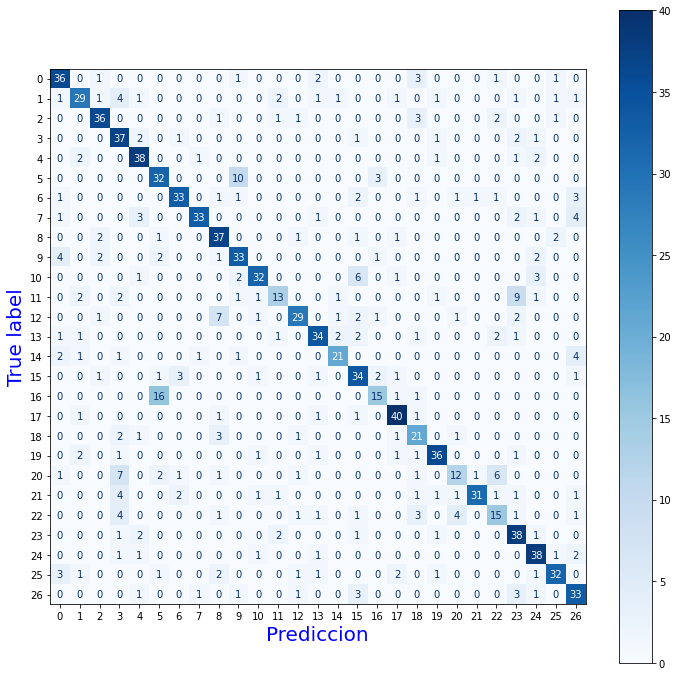

In [12]:
ConfusionMatrixDisplay.from_predictions(testTargets, predicted2, cmap="Blues")
plt.gcf().set_size_inches(12,12)
plt.xlabel("Prediccion", color="blue", fontsize=20)
plt.ylabel("True label", color="blue", fontsize=20)

In [13]:
clfMlp3 = MLPClassifier(solver='adam', alpha=0.2, hidden_layer_sizes=(2000,1000,500,250), max_iter=30000)
clfMlp3.fit(trainData, trainTargets)
predicted3=clfMlp3.predict(testData)
print("Exactitud MLP-3: ", accuracy_score(testTargets, predicted3))
print("Precision MLP-3: ", precision_score(testTargets, predicted3, average='macro'))
print("Recuperacion MLP-3: ", recall_score(testTargets, predicted3, average='macro'))

Exactitud MLP-3:  0.7204585537918872
Precision MLP-3:  0.7213447281866474
Recuperacion MLP-3:  0.7094356439046327


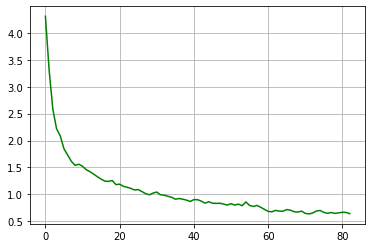

In [14]:
plt.plot(clfMlp3.loss_curve_, "g")
plt.grid(True)

Text(0, 0.5, 'True label')

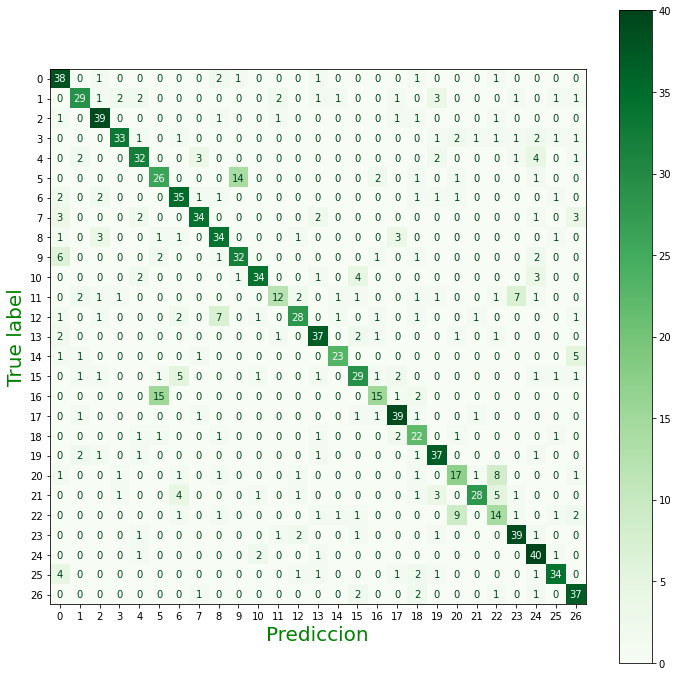

In [15]:
ConfusionMatrixDisplay.from_predictions(testTargets, predicted3, cmap="Greens" )
plt.gcf().set_size_inches(12,12)
plt.xlabel("Prediccion", color="green", fontsize=20)
plt.ylabel("True label", color="green", fontsize=20)

In [16]:
clfMlp4 = MLPClassifier(activation="tanh", learning_rate="constant", solver='adam',
                       alpha=0.2, hidden_layer_sizes=(500), max_iter=3000)

clfMlp4.fit(trainData, trainTargets)
predicted4=clfMlp4.predict(testData)
print("Exactitud MLP-4: ", accuracy_score(testTargets, predicted4))
print("Precision MLP-4: ", precision_score(testTargets, predicted4, average='macro'))
print("Recuperacion MLP-4: ", recall_score(testTargets, predicted4, average='macro'))

Exactitud MLP-4:  0.7037037037037037
Precision MLP-4:  0.7365110318694507
Recuperacion MLP-4:  0.6943010241105146


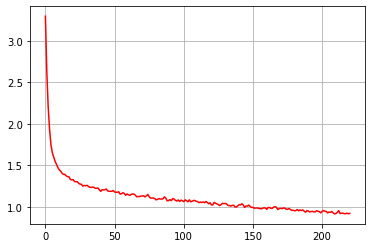

In [17]:
plt.plot(clfMlp4.loss_curve_, "r")
plt.grid(True)

Text(0, 0.5, 'True label')

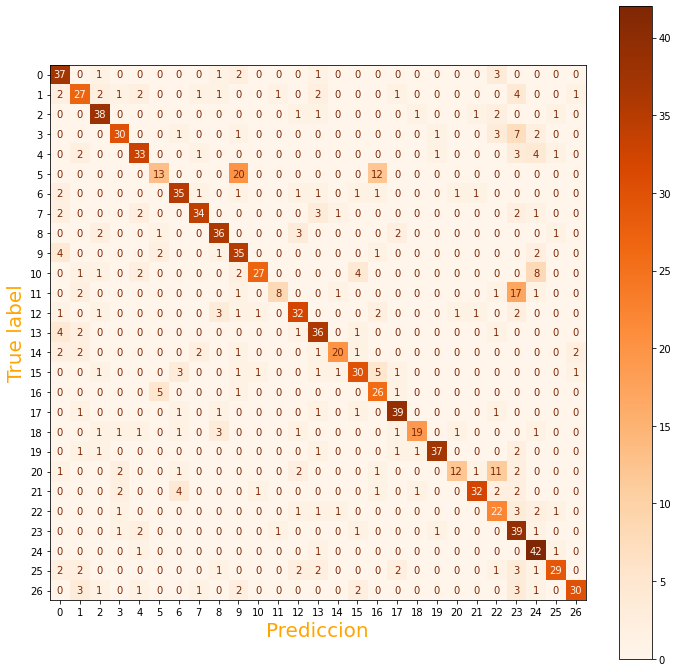

In [18]:
ConfusionMatrixDisplay.from_predictions(testTargets, predicted4, cmap="Oranges")
plt.gcf().set_size_inches(12,12)
plt.xlabel("Prediccion", color="orange", fontsize=20)
plt.ylabel("True label", color="orange", fontsize=20)

In [19]:
clfMlp5 = MLPClassifier(activation="tanh", learning_rate="constant", solver='adam',
                       alpha=0.2, hidden_layer_sizes=(2000, 1000, 500), max_iter=3000)

clfMlp5.fit(trainData, trainTargets)
predicted5=clfMlp5.predict(testData)
print("Exactitud MLP-5: ", accuracy_score(testTargets, predicted5))
print("Precision MLP-5: ", precision_score(testTargets, predicted5, average='macro'))
print("Recuperacion MLP-5: ", recall_score(testTargets, predicted5, average='macro'))

Exactitud MLP-5:  0.7151675485008818
Precision MLP-5:  0.7231109717344901
Recuperacion MLP-5:  0.7074572310030859


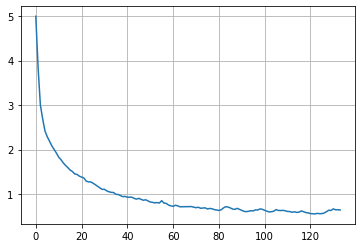

In [20]:
plt.plot(clfMlp5.loss_curve_)
plt.grid(True)

Text(0, 0.5, 'True label')

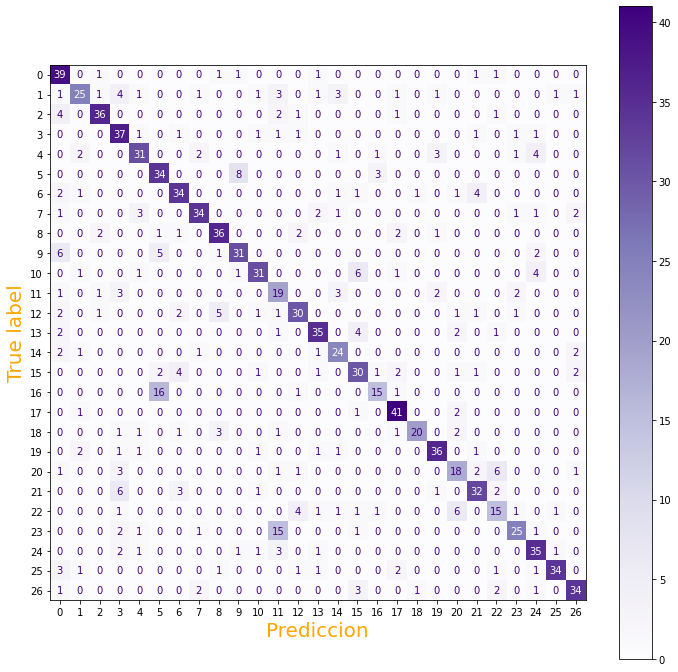

In [22]:
ConfusionMatrixDisplay.from_predictions(testTargets, predicted5, cmap="Purples" )
plt.gcf().set_size_inches(12,12)
plt.xlabel("Prediccion", color="orange", fontsize=20)
plt.ylabel("True label", color="orange", fontsize=20)